In [1]:
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.nn.modules.module import Module

In [2]:
class SinNet(Module):

    def __init__(self):
        super(SinNet, self).__init__()

        H = 5
        self._layers = [
            torch.nn.Linear(1, H),
            torch.nn.ReLU(),
            torch.nn.Linear(H, 1),
        ]

        self._model = torch.nn.Sequential(*self._layers)
        
        self._model.cuda()

    def forward(self, *input):
        return self._model(*input)

sin_net = SinNet()
 
loss_fn = torch.nn.MSELoss(size_average=False)
loss_val_fn = torch.nn.MSELoss(size_average=False)

optimizer = torch.optim.SGD(sin_net.parameters(), lr=1e-4)

C = 10
f = lambda x: torch.sin(torch.mul(x, C))

for epoch in range(5000):
    x = Variable(torch.rand(1, 1)).cuda()
    y_pred = sin_net(x)
    y = f(x)
    
    tr_loss = loss_fn(y_pred, y)
    
    x_val = Variable(torch.rand(1, 1), requires_grad=False).cuda()
    y_val = f(x_val)
    y_val_pred = sin_net(x_val)
    val_loss = loss_val_fn(y_val_pred, y_val)
        
    if epoch % 500 == 0:
        print("Losses: {0:.5f} {1:.5f}".format(tr_loss.data.cpu().numpy()[0], val_loss.data.cpu().numpy()[0]))

    optimizer.zero_grad()
    tr_loss.backward()
    optimizer.step()

x_pred = Variable(torch.mul(torch.rand(500, 1), C), requires_grad=False).cuda()
y_pred = sin_net(x_pred)

RuntimeError: cuda runtime error (30) : unknown error at /b/wheel/pytorch-src/torch/lib/THC/THCGeneral.c:66

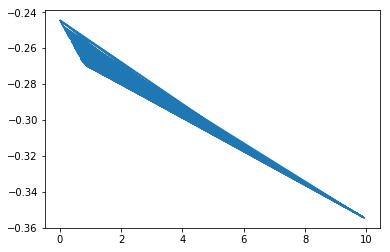

In [3]:
plt.plot(ar[:,0], ar[:,1])
plt.show()